<font color = 'green'  size = 3>

# 01 - Precio de Viviendas en Venta vs Taza de Criminalidad

# Regression Lineal Simple

Importamos las librerias de utilidad

In [1]:
import turicreate
import matplotlib.pyplot as plt
%matplotlib inline

<font color = 'green'>
    
## Cargamos los datos de Precio de Viviendas en Venta vs Taza de Criminalidad.

In [2]:
datos = turicreate.SFrame('Philadelphia_Crime.csv')

Finished parsing file /home/omar/Coursera - Machine Learning/Course 2 - Machine Learning - Regression/Week 1/Philadelphia/Philadelphia_Crime.csv

Parsing completed. Parsed 99 lines in 0.069218 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/omar/Coursera - Machine Learning/Course 2 - Machine Learning - Regression/Week 1/Philadelphia/Philadelphia_Crime.csv

Parsing completed. Parsed 99 lines in 0.362841 secs.

El dataset contiene el precio de viviendas en venta de ciertos vecindarios en Filadelfia. Incluye la taza de criminalidad en los vecindarios ('CrimeRate'), distancia en millas entre el vecindario y el centro de la ciudad ('MilesPhila'), el nombre del vecindario ('Name') y el nombre del condado (County')

In [3]:
datos

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


<font color = 'green'>
    
## Exploración de los datos.

El precio de las viviendas en un vecindario esta correlacionado con la taza de criminalidad de ese mismo vecindario. Los vecindarios con menor taza de criminalidad tienden a tener viviendas con mayor precio y viceversa.  

Dicha relación se muestra en el siguiente gráfico:

In [4]:
# 'CrimeRate' corresponde al eje X mientras que 'HousePrice' corresponde al eje Y.
turicreate.show(datos['CrimeRate'], datos['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

Importante notar que hay un dato que indica que existe una taza de criminalida muy alta, la ubicación corresponde al centro de la ciudad, dicho dato es ajeno al resto de los demás. Observemos que ocurre al momento de hacer nuestro modelo de regression.

<font color = 'green'>
    
## Primer modelo de Regression Lineal Simple.

Realicemos el modelo de regresión lineal simple usando la taza de criminalidad como característica.

In [5]:
modelo_criminalidad = turicreate.linear_regression.create(
    datos,                           # Nombre de la variable que contiene el conjunto de datos.
    target = "HousePrice",           # La salida será el valor de la vivienda en venta.
    features = ['CrimeRate'],        # La entrada será la tasa de criminalidad .
    validation_set = None,
    verbose = False
)

Usando Matplotlib observemos el ajuste obtenido con el modelo.

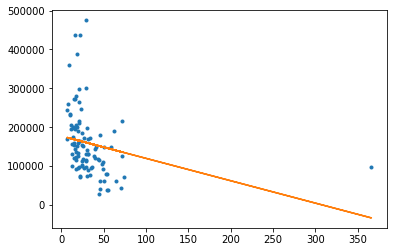

In [6]:
plt.plot(datos['CrimeRate'], datos['HousePrice'],'.',                  # Datos originales.
         datos['CrimeRate'], modelo_criminalidad.predict(datos),'-')   # Ajuste hecho con el modelo.

La línea continua corresponde al ajuste hecho por el modelo. Se puede observar que el dato de la derecha influye bastante en el ajuste.

<font color = 'green'>
    
## Eliminación del dato correspondeinte al centro de la ciudad.

El centro de la ciudad tiene una alta taza de criminalidad comparada con el resto de vecindarios a su alrededor, removamos dicho dato y observemos que sucede si reajustamos con el modelo.

Como se trata del centro de la ciudad, en la base de datos indica que 'MilesPhila = 0.0'. Eliminemos ese dato.

In [7]:
# Nuevo conjunto de datos sin el dato correspondiente al centro de la ciudad.
datos_2 = datos[datos['MilesPhila'] != 0.0]

Observemos cómo se ven distribuidos los datos. 

In [8]:
turicreate.show(datos_2['CrimeRate'], datos_2['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

<font color = 'green'>
    
## Nuevo modelo de Regresión Lineal Simple

Realicemos de nuevo el modelo de regresión lineal simple ahora con el dato removido.

In [9]:
modelo_criminalidad_2 = turicreate.linear_regression.create(
    datos_2,
    target = 'HousePrice',
    features = ['CrimeRate'],
    validation_set = None,
    verbose = False
)

Observemos gráficamente el ajuste obtenido

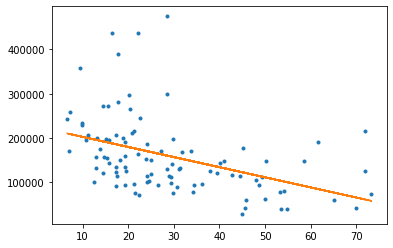

In [10]:
plt.plot(datos_2['CrimeRate'], datos_2['HousePrice'], '.',                   # Nuevo conjunto de datos
         datos_2['CrimeRate'], modelo_criminalidad_2.predict(datos_2), '-')  # Ajuste correspondiente al nuevo conjunto de datos

En esta ocación se puede observar un mejor ajuste a los datos.

<font color = 'green'>
    
## Comparación de los coeficientes entre ambos modelos.

Recordemos que como se trata de una regresión lineal simple, el ajuste que se obtiene del modelo corresponde a una recta de la forma $\hat{y} = wx + b$, donde $w$ y $b$ son los coeficientes determinados por el modelo y que matemáticamente corresponden a la pendiente y ordenada al origen respectivamente.

En este caso $b$ es el valor donde intercepta a $y$ ('intercept'), mientras que $w$ es la tasa de cambio del precio de la vivienda en función de la tasa de criminalidad ('CrimeRate').

Los coeficientes del primer modelo son:

In [11]:
modelo_criminalidad.coefficients

name,index,value,stderr
(intercept),None,176626.04688088183,11245.588219378817
CrimeRate,None,-576.8049490581076,226.9022595096533


Los coeficientes del segundo modelo son:

In [12]:
modelo_criminalidad_2.coefficients

name,index,value,stderr
(intercept),None,225204.60430309843,16404.02475138665
CrimeRate,None,-2287.6971744328944,491.53747812308944


En el segundo modelo (sin el dato del centro de la ciudad) se puede observar que la disminución en los precios de las viviendas es de 2287 por unidad de aumento de la delincencia, mientras que en el primer modelo la disminución de los precios de las viviendas es de tan solo 576 por unidad de aumento en el crimen. ¡Esto es significativamente diferente!.

Se dice que el dato del centro de la ciudad es un punto de "alto apalancamiento" porque se encuentra en un valor $x$ extremo donde no hay otras observaciones, como resultado, este punto tiene el "potencial" de cambiar drásticamente la línea de mínimos cuadrados ya que el centro de masa está fuertemente influenciado por este punto y la línea de mínimos cuadrados intentará encajar cerca de ese punto periférico (en $x$). 

Si un alto punto de apalancamiento sigue la tendencia de los otros datos, esto podría no tener mucho efecto, pero si este punto difiere de alguna manera, puede tener una gran influencia en el ajuste resultante, como ocurrió en este caso.

Una observación influyente es aquella en la que la eliminación del punto cambia significativamente el ajuste. Como se discutió anteriormente, los puntos de alto apalancamiento son buenos candidatos para ser observaciones influyentes, pero no necesariamente. Otras observaciones que no son puntos de apalancamiento también pueden ser observaciones influyentes (por ejemplo, muy alejadas en $y$ incluso si $x$ es un valor típico).

<font color = 'green'>
    
## Gráfica con ambos ajustes.

Veamos gráficamente las diferencias.

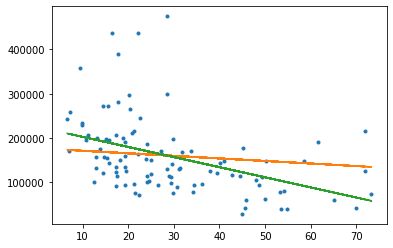

In [13]:
plt.plot(datos_2['CrimeRate'], datos_2['HousePrice'], '.',                    
         datos_2['CrimeRate'], modelo_criminalidad.predict(datos_2), '-',
         datos_2['CrimeRate'], modelo_criminalidad_2.predict(datos_2), '-')

La línea naranja corresponde al ajuste del conjunto de datos inicial y la línea verde corresponde al ajuste hecho sin el dato del centro de la ciudad.

Se puede observar gráficamente cómo con el segundo modelo el precio de las viviendas disminuye mucho mas por unidad de aumento en la tasa de criminalidad.

<font color = 'green'>
    
## Un modelo más.

Basado en la discusión anterior, observemos que tanto influyen en el ajuste los datos que corresponden a un alto costo de la viviendas, consideremos precios mayores a $350000$ y eliminemos dichos datos de nuestra base de datos.

In [14]:
# Nuevo conjunto de datos sin las viviendas con alto precio en venta.
datos_3 = datos_2[datos_2['HousePrice'] < 350000]

Realizamos el modelo.

In [15]:
modelo_criminalidad_3 = turicreate.linear_regression.create(
    datos_3,
    target = 'HousePrice',
    features = ['CrimeRate'],
    validation_set = None,
    verbose = False
)

<font color = 'green'>
    
## Comparación de los coeficientes entre los tres modelos.

In [16]:
# Coeficientes del primer modelo.
modelo_criminalidad.coefficients

name,index,value,stderr
(intercept),None,176626.04688088183,11245.588219378817
CrimeRate,None,-576.8049490581076,226.9022595096533


In [17]:
# Coeficientes del segundo modelo.
modelo_criminalidad_2.coefficients

name,index,value,stderr
(intercept),None,225204.60430309843,16404.02475138665
CrimeRate,None,-2287.6971744328944,491.53747812308944


In [18]:
# Coeficientes del tercer modelo.
modelo_criminalidad_3.coefficients

name,index,value,stderr
(intercept),None,199073.5896152512,11932.510110455862
CrimeRate,None,-1837.712809888722,351.5196093328531


Se puede observar que ahora el precio de las viviendas disminuye menos que con el segundo modelo.

<font color = 'green'>
    
## Gráfica con los tres ajustes.

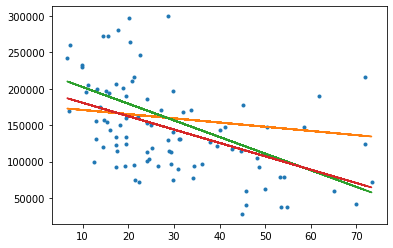

In [19]:
plt.plot(datos_3['CrimeRate'], datos_3['HousePrice'], '.',                   
         datos_3['CrimeRate'], modelo_criminalidad.predict(datos_3), '-',
         datos_3['CrimeRate'], modelo_criminalidad_2.predict(datos_3), '-',
         datos_3['CrimeRate'], modelo_criminalidad_3.predict(datos_3), '-')         

La línea naranja corresponde al ajuste del conjunto de datos original, la línea verde es el ajuste obtenido con el segundo modelo y la línea roja corresponde al ajuste eliminando los datos de las viviendas con un alto precio de venta.